d:\anaconda\envs\nlp\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\anaconda\envs\nlp\Lib\site-packages\anndata\_core\aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


             cluster
0      Erythrocyte 4
1          Myeloid 1
2      Beta ionocyte
3      Erythrocyte 4
4        Goblet cell
...              ...
13194  Erythrocyte 4
13195    Goblet cell
13196    Goblet cell
13197  Erythrocyte 1
13198    Goblet cell

[7868 rows x 1 columns]
              barcode_cells                  cell   sample DevelopmentalStage  \
0        AAACCTGAGCTAGTTC.1    AAACCTGAGCTAGTTC.1   SIGAB5               st40   
1        AAACCTGGTGGGTCAA.1    AAACCTGGTGGGTCAA.1   SIGAB5               st40   
2        AAACCTGGTTTGTTGG.1    AAACCTGGTTTGTTGG.1   SIGAB5               st40   
3        AAACGGGGTCGGCATC.1    AAACGGGGTCGGCATC.1   SIGAB5               st40   
4        AAACGGGTCCTACAGA.1    AAACGGGTCCTACAGA.1   SIGAB5               st40   
...                     ...                   ...      ...                ...   
13194    TTCTTAGAGTACCGGA.1    TTCTTAGAGTACCGGA.1  SIGAB10               st40   
13195    TTGACTTAGAGTAAGG.1    TTGACTTAGAGTAAGG.1  SIGAB10               st

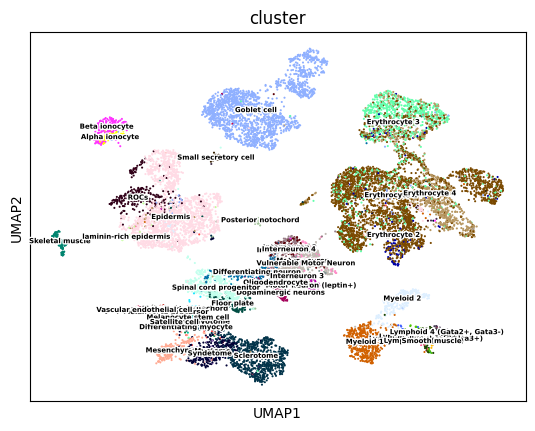

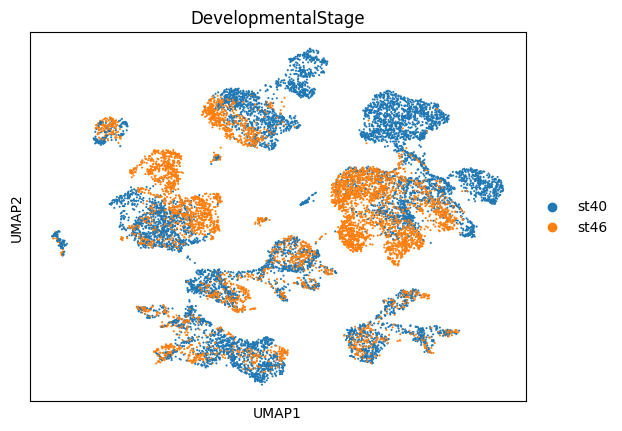

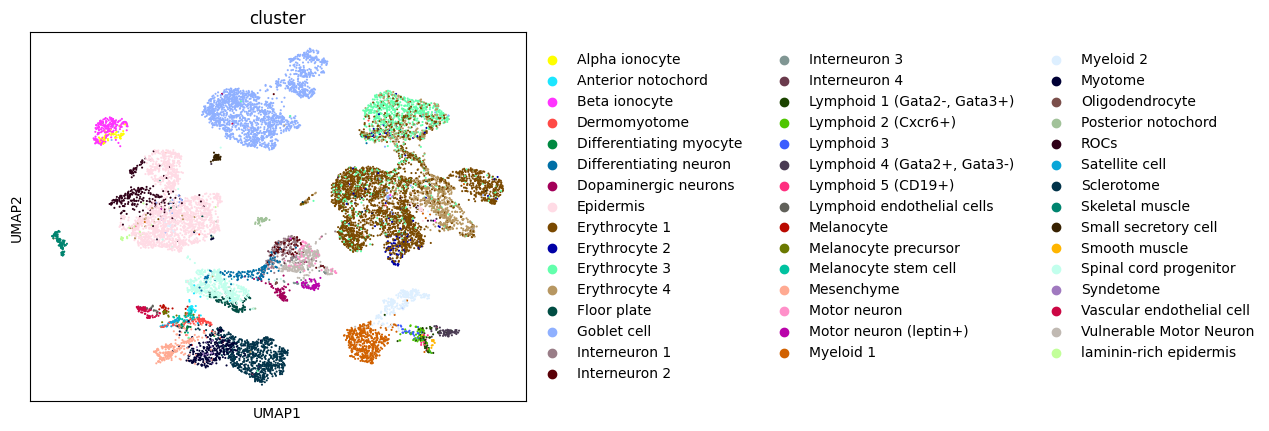

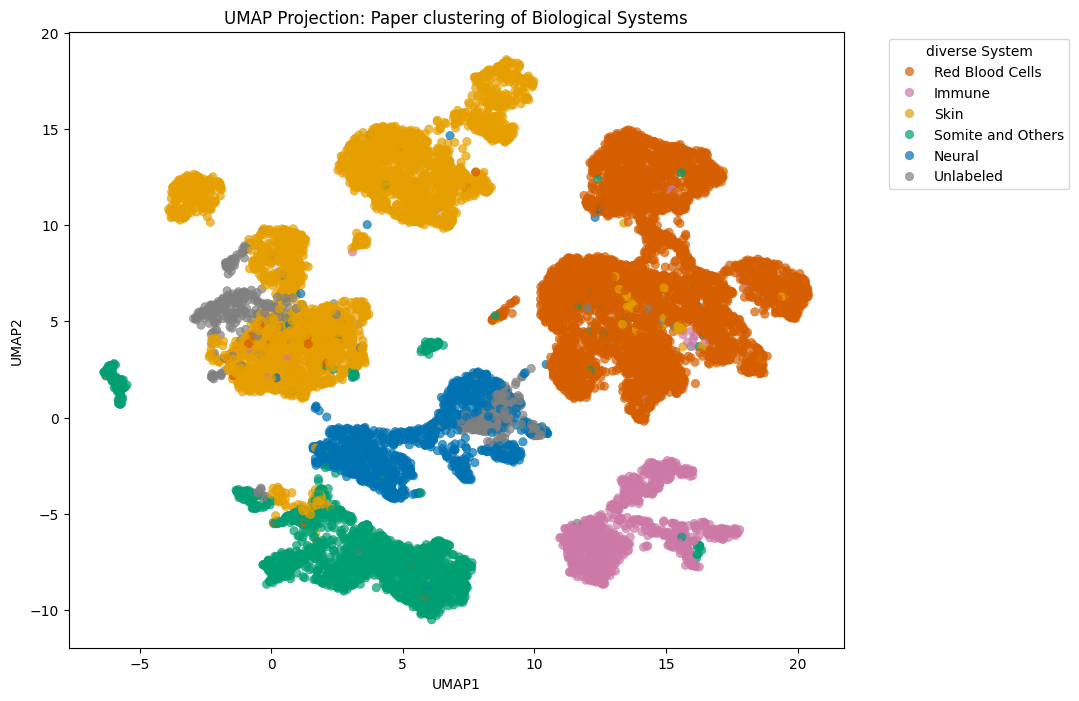

Adjusted Rand Index (ARI): 0.5998
Silhouette Score: 0.3261
Approximate RAND Index: 0.7999


In [ ]:
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap.umap_ as umap
from scipy.spatial.distance import cdist
from scipy.stats import entropy


adata = sc.read_h5ad("cleaned_processed_frogtail.h5ad")
tp = 'st40'  
ad_fil = adata[adata.obs["DevelopmentalStage"] == tp]
# print(adata_time_filtered)
df_metadata = ad_fil.obs[["cluster"]]
print(df_metadata)
print(adata.obs)
adata.var
adata.X

adata.obs

sc.pp.filter_genes(adata, min_counts=3)  
sc.pp.normalize_total(adata, target_sum=1e4) 
sc.pp.log1p(adata)
sc.pp.pca(adata, n_comps=35) 
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['cluster'], legend_loc='on data', legend_fontsize=5, legend_fontoutline=2) 
sc.pl.umap(adata, color=['cluster'], save="_clusters.png")

from sklearn.cluster import KMeans
dt_vis = adata.obsm['X_umap']
kmeans = KMeans(n_clusters=5, random_state=42)
adata.obs['kmeans_clusters'] = kmeans.fit_predict(dt_vis).astype(str)  
sc.pl.umap(adata, color=['kmeans_clusters'])




import seaborn as sns

umap_data = adata.obsm['X_umap']
clusters = adata.obs['cluster']
system_labels = {
    'Skin': ['Goblet cell', 'Regeneration Organizing Cell (ROC)', 'Epidermis', 'Melanocyte', 'Melanocyte precursor', 'Melanocyte stem cell', 'Laminin-rich epidermis', 'Alpha ionocyte', 'Beta ionocyte', 'Small secretory cell'],
    'Neural': ['Differentiating neuron', 'Dopaminergic neurons', 'Spinal cord progenitor', 'Floor plate', 'Oligodendrocyte', 'Vulnerable motor neuron', 'Motor neuron', 'Motor neuron (leptin+)', 'Interneuron 1', 'Interneuron 2', 'Interneuron 3', 'Interneuron 4'],
    'Immune': ['Lymphoid 1 (Gata2-, Gata3+)', 'Lymphoid 2 (Cxcr6+)', 'Lymphoid 3', 'Lymphoid 4 (Gata2+, Gata3-)', 'Lymphoid 5 (CD19+)', 'Lymphoid endothelial cell', 'Myeloid 1', 'Myeloid 2'],
    'Somite and Others': ['Skeletal muscle', 'Smooth muscle', 'Sclerotome', 'Syndetome', 'Myotome', 'Differentiating myocyte', 'Mesenchyme', 'Satellite cell', 'Dermomyotome', 'Posterior notochord', 'Anterior notochord', 'Vascular endothelial cell'],
    'Red Blood Cells': ['Erythrocyte 1', 'Erythrocyte 2', 'Erythrocyte 3', 'Erythrocyte 4']
}

adata.obs['biological_system'] = 'Unlabeled'  
for system, cell_types in system_labels.items():
    adata.obs.loc[adata.obs['cluster'].isin(cell_types), 'biological_system'] = system
system_palette = {
    'Skin': '#E69F00',  
    'Neural': '#0072B2',  
    'Immune': '#CC79A7', 
    'Somite and Others': '#009E73',  
    'Red Blood Cells': '#D55E00', 
    'Unlabeled': 'gray'
}

plt.figure(figsize=(10, 8))
sns.scatterplot(x=umap_data[:, 0], y=umap_data[:, 1], hue=adata.obs['biological_system'], palette=system_palette, alpha=0.7, edgecolor=None)
plt.title("UMAP Projection: Paper clustering of Biological Systems")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.legend(title="diverse System", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

from sklearn.metrics import adjusted_rand_score, silhouette_score
from scipy.spatial.distance import pdist, squareform

leg = adata.obs['biological_system']  
ld_leg = adata.obs['kmeans_clusters']  
real = leg.astype('category').cat.codes
numer = ld_leg.astype('category').cat.codes

ari = adjusted_rand_score(real, numer)
sil = silhouette_score(adata.obsm["X_pca"], numer)
rand = (ari + 1) / 2  

print("ARI: {}".format(ari))
print("Silhouette Score: {}".format(sil))
print("RAND Index: {}".format(rand))

In [12]:
adata.obs

barcode_cells                  cell   sample DevelopmentalStage  \
0        AAACCTGAGCTAGTTC.1    AAACCTGAGCTAGTTC.1   SIGAB5               st40   
1        AAACCTGGTGGGTCAA.1    AAACCTGGTGGGTCAA.1   SIGAB5               st40   
2        AAACCTGGTTTGTTGG.1    AAACCTGGTTTGTTGG.1   SIGAB5               st40   
3        AAACGGGGTCGGCATC.1    AAACGGGGTCGGCATC.1   SIGAB5               st40   
4        AAACGGGTCCTACAGA.1    AAACGGGTCCTACAGA.1   SIGAB5               st40   
...                     ...                   ...      ...                ...   
13194    TTCTTAGAGTACCGGA.1    TTCTTAGAGTACCGGA.1  SIGAB10               st40   
13195    TTGACTTAGAGTAAGG.1    TTGACTTAGAGTAAGG.1  SIGAB10               st40   
13196    TTGCGTCTCAAGAAGT.1    TTGCGTCTCAAGAAGT.1  SIGAB10               st40   
13197    TTGTAGGCAGTACACT.1    TTGTAGGCAGTACACT.1  SIGAB10               st40   
13198  TTTGCGCAGCGTGAAC.1.1  TTTGCGCAGCGTGAAC.1.1  SIGAB10               st40   

       DaysPostAmputation        cluster         X          Y CellCyclePhase  \
0                       3  Erythrocyte 4 -6.395430   0.832323            G2M   
1                       3      Myeloid 1 -2.428271  13.826715             G1   
2                       3  Beta ionocyte -1.398049 -14.653897             G1   
3                       3  Erythrocyte 4 -5.863765   0.489598            G2M   
4                       3    Goblet cell  2.106444  -6.594430             G1   
...                   ...            ...       ...        ...            ...   
13194                   3  Erythrocyte 4 -5.879582   0.924197            G2M   
13195                   3    Goblet cell  1.252149  -8.870151             G1   
13196                   3    Goblet cell  0.693335  -9.168521             G1   
13197                   3  Erythrocyte 1 -4.087618   4.145738             G1   
13198                   3    Goblet cell  0.803595  -7.395422             G1   

        Sample       Lane Condition  batch kmeans_clusters biological_system  \
0       SIGAB5  SLX-15583    ST40_3      3               2   Red Blood Cells   
1       SIGAB5  SLX-15583    ST40_3      3               1            Immune   
2       SIGAB5  SLX-15583    ST40_3      3               4              Skin   
3       SIGAB5  SLX-15583    ST40_3      3               2   Red Blood Cells   
4       SIGAB5  SLX-15583    ST40_3      3               0              Skin   
...        ...        ...       ...    ...             ...               ...   
13194  SIGAB10  SLX-15739    ST40_3      4               2   Red Blood Cells   
13195  SIGAB10  SLX-15739    ST40_3      4               0              Skin   
13196  SIGAB10  SLX-15739    ST40_3      4               0              Skin   
13197  SIGAB10  SLX-15739    ST40_3      4               3   Red Blood Cells   
13198  SIGAB10  SLX-15739    ST40_3      4               0              Skin   

       ROC_binary louvain louvain_clusters leiden  
0               0       2                6      2  
1               0      12               11     13  
2               0      23               17     23  
3               0       2                6      2  
4               0       1                1     10  
...           ...     ...              ...    ...  
13194           0       2                6      2  
13195           0       1                1      1  
13196           0       8                1      1  
13197           0      24                2     22  
13198           0       1                1      1  

[13199 rows x 19 columns]

In [22]:
adata.X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 29294483 stored elements and shape (13199, 26229)>

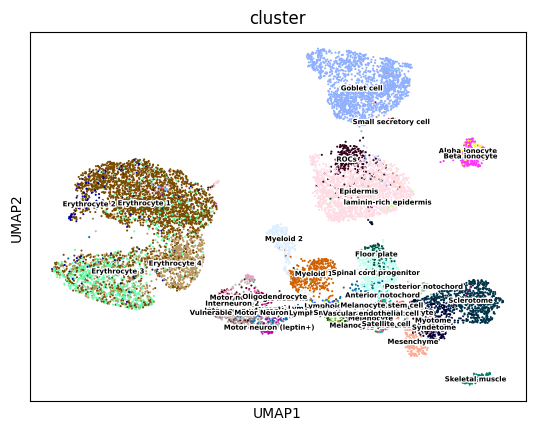

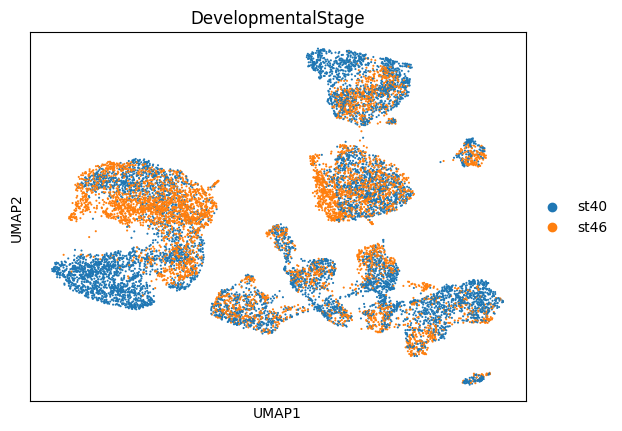

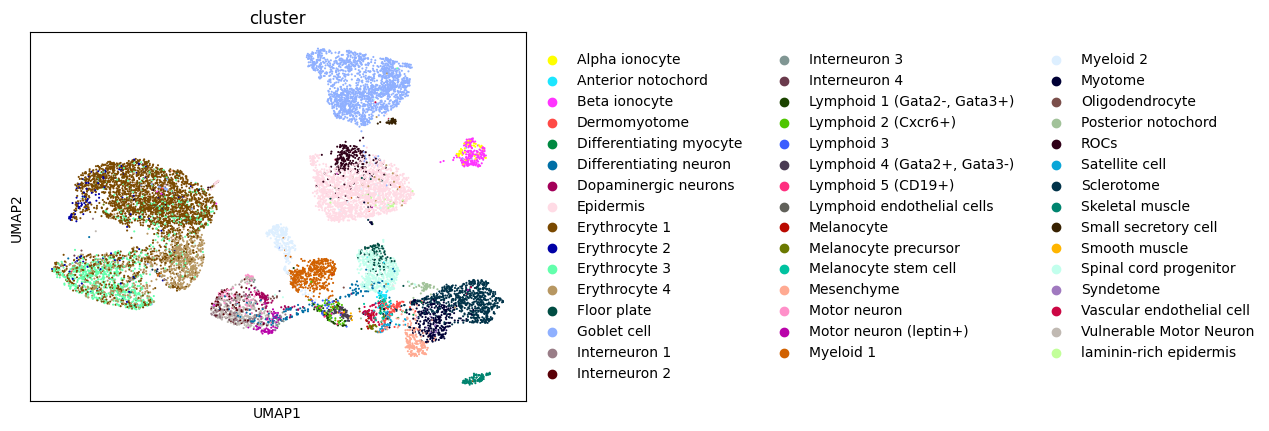

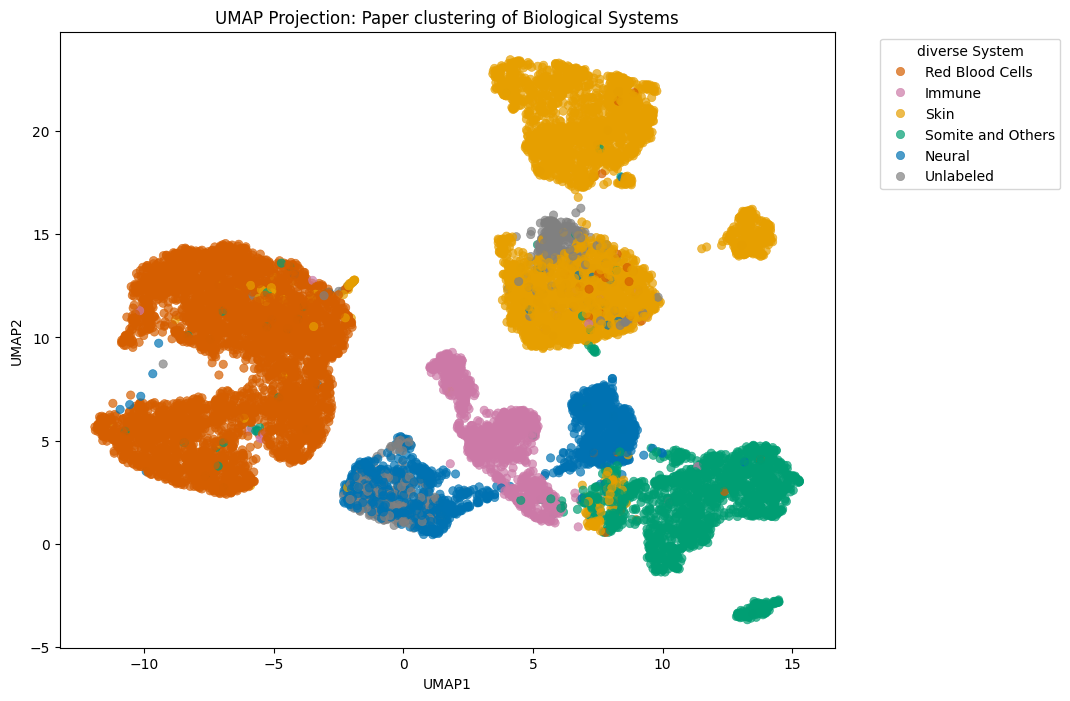

Adjusted Rand Index (ARI): 0.6590
Silhouette Score: 0.2627
Approximate RAND Index: 0.8295


In [ ]:
sc.pp.pca(adata, n_comps=25)  
sc.pp.neighbors(adata, n_neighbors=17, n_pcs=15)

sc.tl.umap(adata)
sc.pl.umap(adata, color=['cluster'], legend_loc='on data', legend_fontsize=5, legend_fontoutline=2) 
sc.pl.umap(adata, color=['cluster'], save="_clusters.png")

from sklearn.cluster import KMeans

dt = adata.obsm['X_umap']
kmeans = KMeans(n_clusters=5, random_state=42)
adata.obs['kmeans_clusters'] = kmeans.fit_predict(dt).astype(str)  # Convert to string for visualization
sc.pl.umap(adata, color=['kmeans_clusters'])




import seaborn as sns

umap_data = adata.obsm['X_umap']
clusters = adata.obs['cluster']

system_labels = {
    'Skin': ['Goblet cell', 'Regeneration Organizing Cell (ROC)', 'Epidermis', 'Melanocyte', 'Melanocyte precursor', 'Melanocyte stem cell', 'Laminin-rich epidermis', 'Alpha ionocyte', 'Beta ionocyte', 'Small secretory cell'],
    'Neural': ['Differentiating neuron', 'Dopaminergic neurons', 'Spinal cord progenitor', 'Floor plate', 'Oligodendrocyte', 'Vulnerable motor neuron', 'Motor neuron', 'Motor neuron (leptin+)', 'Interneuron 1', 'Interneuron 2', 'Interneuron 3', 'Interneuron 4'],
    'Immune': ['Lymphoid 1 (Gata2-, Gata3+)', 'Lymphoid 2 (Cxcr6+)', 'Lymphoid 3', 'Lymphoid 4 (Gata2+, Gata3-)', 'Lymphoid 5 (CD19+)', 'Lymphoid endothelial cell', 'Myeloid 1', 'Myeloid 2'],
    'Somite and Others': ['Skeletal muscle', 'Smooth muscle', 'Sclerotome', 'Syndetome', 'Myotome', 'Differentiating myocyte', 'Mesenchyme', 'Satellite cell', 'Dermomyotome', 'Posterior notochord', 'Anterior notochord', 'Vascular endothelial cell'],
    'Red Blood Cells': ['Erythrocyte 1', 'Erythrocyte 2', 'Erythrocyte 3', 'Erythrocyte 4']
}

adata.obs['biological_system'] = 'Unlabeled'  
for system, cell_types in system_labels.items():
    adata.obs.loc[adata.obs['cluster'].isin(cell_types), 'biological_system'] = system

system_palette = {
    'Skin': '#E69F00',  
    'Neural': '#0072B2',  
    'Immune': '#CC79A7',  
    'Somite and Others': '#009E73', 
    'Red Blood Cells': '#D55E00', 
    'Unlabeled': 'gray'
}

plt.figure(figsize=(10, 8))
sns.scatterplot(x=umap_data[:, 0], y=umap_data[:, 1], hue=adata.obs['biological_system'], palette=system_palette, alpha=0.7, edgecolor=None)
plt.title("UMAP Projection: Paper clustering of Biological Systems")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.legend(title="diverse System", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

from sklearn.metrics import adjusted_rand_score, silhouette_score
from scipy.spatial.distance import pdist, squareform

leg = adata.obs['biological_system']  
ld_leg = adata.obs['kmeans_clusters']  
real = leg.astype('category').cat.codes
numer = ld_leg.astype('category').cat.codes

ari = adjusted_rand_score(real, numer)
sil = silhouette_score(adata.obsm["X_pca"], numer)
rand = (ari + 1) / 2  

print("ARI: {}".format(ari))
print("Silhouette Score: {}".format(sil))
print("RAND Index: {}".format(rand))

[I 2025-02-19 16:58:05,607] A new study created in memory with name: no-name-ffaeebcd-0e1b-4ace-9baf-0b4d9f9bf825
d:\anaconda\envs\nlp\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [5, 20] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 19].
  warnings.warn(
[I 2025-02-19 16:58:29,515] Trial 0 finished with value: 0.7264319865401354 and parameters: {'n_comps': 20, 'n_pcs': 20, 'n_neighbors': 17, 'init': 'k-means++', 'max_iter': 400, 'n_init': 10}. Best is trial 0 with value: 0.7264319865401354.
d:\anaconda\envs\nlp\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [5, 20] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 19].
  warnings.warn(
[I 2025-02-19 16:59:01,975] Trial 1 finished with value: 0.7623054936381495 and parameters: {'n_comps': 45, 'n_pcs': 45, 'n_neighbors': 7, 'init': 'k-means++', 'max_iter': 300, 'n_init': 15}. Bes

Best K-Means & PCA hyperparameters found: {'n_comps': 25, 'n_pcs': 15, 'n_neighbors': 17, 'init': 'k-means++', 'max_iter': 300, 'n_init': 5}


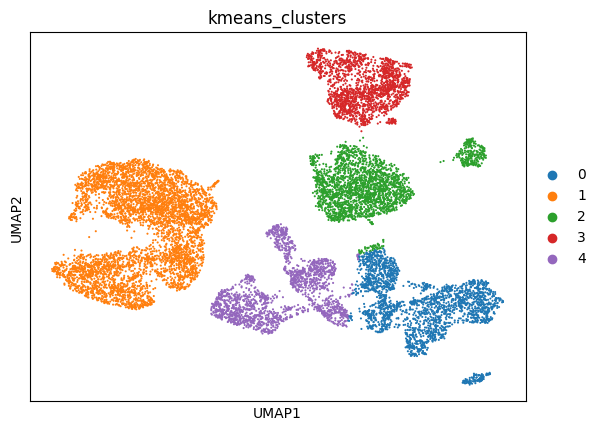

In [ ]:
import optuna
import scanpy as sc
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

def objective_kmeans(trial):
    """Objective function to optimize PCA, k-NN, and K-Means clustering parameters."""

    n_comps = trial.suggest_int("n_comps", 10, 50, step=5)  # PCA components
    n_pcs = trial.suggest_int("n_pcs", 10, n_comps, step=5)  # Ensure n_pcs ≤ n_comps
    n_neighbors = trial.suggest_int("n_neighbors", 5, 20, step=2)  # Number of neighbors

    init_method = trial.suggest_categorical("init", ["k-means++"])
    max_iter = trial.suggest_int("max_iter", 100, 1000, step=100)
    n_init = trial.suggest_int("n_init", 5, 30, step=5)

    sc.pp.pca(adata, n_comps=n_comps)
    sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=n_pcs)
    sc.tl.umap(adata)
    dt = adata.obsm['X_umap']
    kmeans = KMeans(n_clusters=5, init=init_method, max_iter=max_iter, n_init=n_init, random_state=48)
    adata.obs['kmeans_clusters'] = kmeans.fit_predict(dt).astype(str)
    key1 = adata.obs['biological_system'].astype('category').cat.codes
    key2 = adata.obs['kmeans_clusters'].astype('category').cat.codes
    ari = adjusted_rand_score(key1, key2)
    sil = silhouette_score(adata.obsm["X_pca"], key2)
    return ari + sil

cr = optuna.create_study(direction="maximize")
cr.optimize(objective_kmeans, n_trials=20)  

bf = cr.best_params
print("Best K-Means & PCA hyperparameters found:", bf)

sc.pp.pca(adata, n_comps=bf["n_comps"])
sc.pp.neighbors(adata, n_neighbors=bf["n_neighbors"], n_pcs=bf["n_pcs"])
sc.tl.umap(adata)

dk = KMeans(n_clusters=5, init=bf["init"], max_iter=bf["max_iter"], 
                      n_init=bf["n_init"], random_state=42)
adata.obs['kmeans_clusters'] = dk.fit_predict(adata.obsm['X_umap']).astype(str)

sc.pl.umap(adata, color=['kmeans_clusters'])


C:\Users\W\AppData\Local\Temp\ipykernel_19272\2666025995.py:10: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=1.0)  # Adjust resolution to control cluster granularity


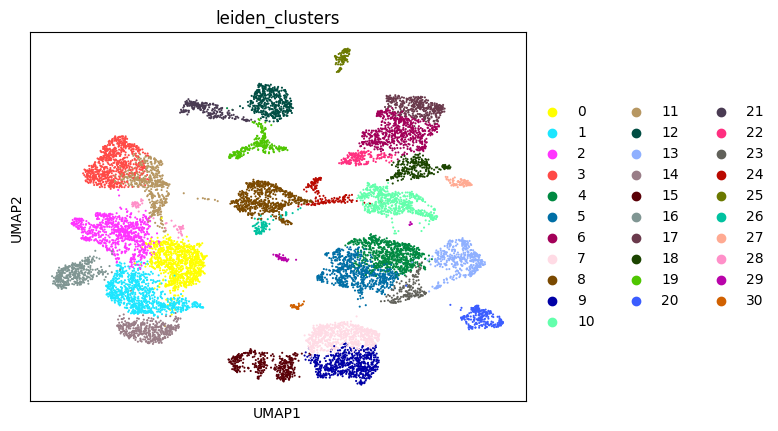

In [ ]:
sc.pp.pca(adata, n_comps=50)
sc.pp.neighbors(adata, n_neighbors=12, n_pcs=40)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=1.0)  
adata.obs['leiden_clusters'] = adata.obs['leiden'].astype(str)
sc.pl.umap(adata, color=['leiden_clusters'])

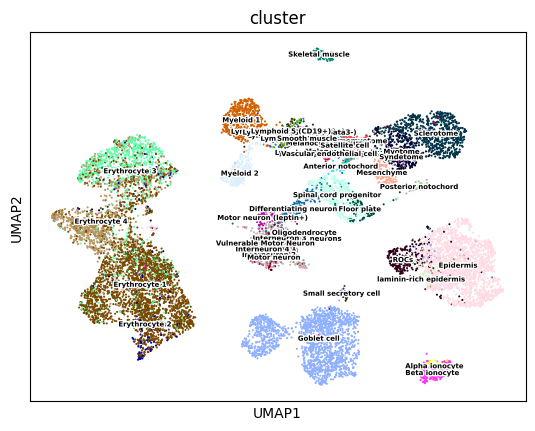

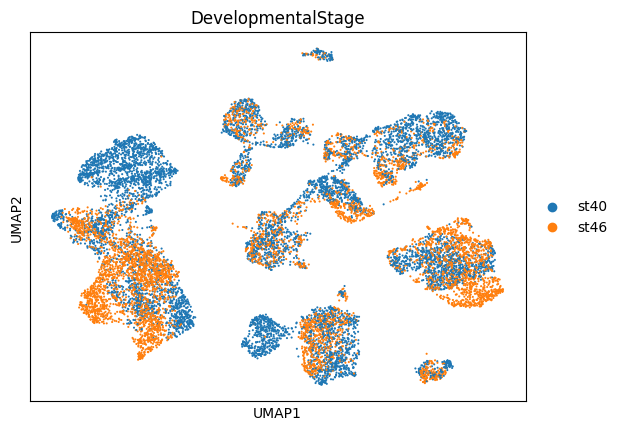

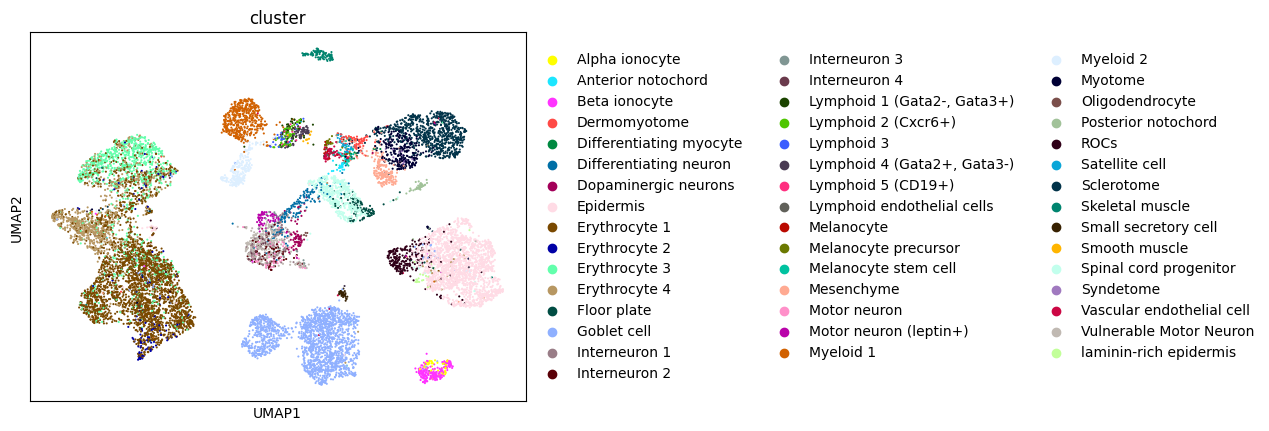

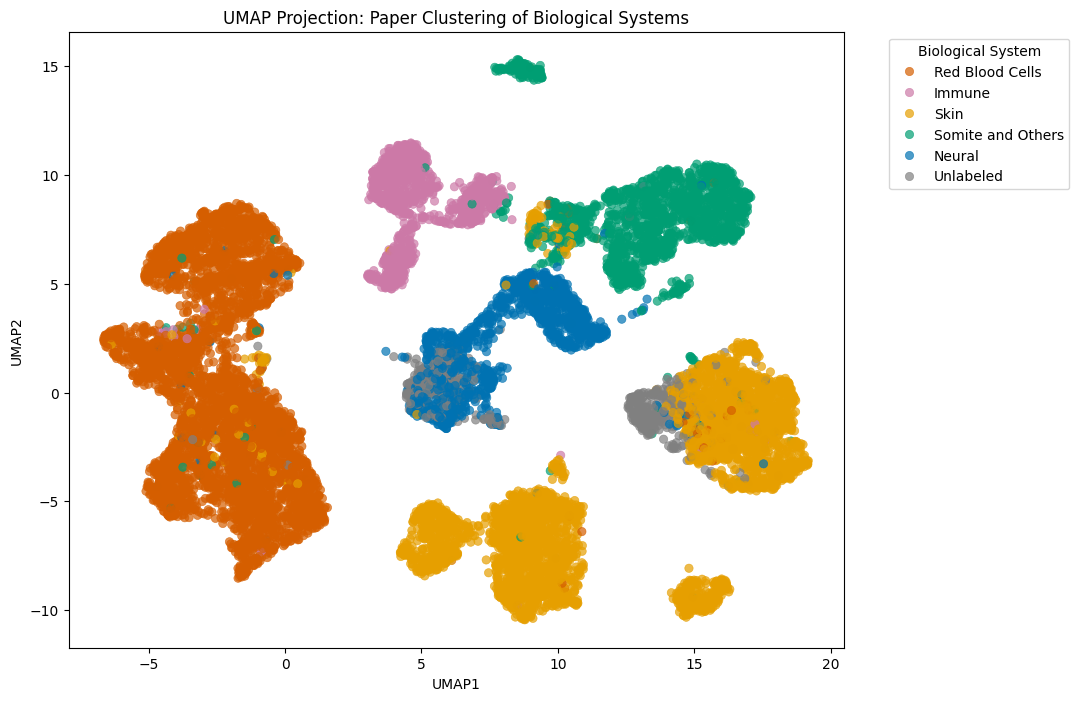

Adjusted Rand Index (ARI): 0.3286
Silhouette Score: 0.2038
Approximate RAND Index: 0.6643


In [ ]:

sc.pp.pca(adata, n_comps=20)  
sc.pp.neighbors(adata, n_neighbors=19, n_pcs=20)

sc.tl.umap(adata)
sc.pl.umap(adata, color=['cluster'], legend_loc='on data', legend_fontsize=5, legend_fontoutline=2)  
sc.pl.umap(adata, color=['DevelopmentalStage'], cmap='viridis')
sc.pl.umap(adata, color=['cluster'], save="_clusters.png")

from sklearn.cluster import KMeans

umap_data = adata.obsm['X_umap']

kmeans = KMeans(n_clusters=5, random_state=42)
adata.obs['kmeans_clusters'] = kmeans.fit_predict(umap_data).astype(str)  # Convert to string for visualization
def drnum(num=5, sr=0.1, er=4.0, step=0.2):
    for res in np.arange(sr, er, step):
        sc.tl.leiden(adata, resolution=res)
        num_clusters = adata.obs['leiden'].nunique()
        if num_clusters == num:
            print(f"Optimal resolution found: {res}")
            return res
    return er 

opt = drnum(num=5, sr=0.2, er=4.0, step=0.2)
sc.tl.leiden(adata, resolution=opt)
sc.pl.umap(adata, color=['leiden'])


umap_data = adata.obsm['X_umap']
clusters = adata.obs['cluster']
system_labels = {
    'Skin': ['Goblet cell', 'Regeneration Organizing Cell (ROC)', 'Epidermis', 'Melanocyte', 'Melanocyte precursor', 'Melanocyte stem cell', 'Laminin-rich epidermis', 'Alpha ionocyte', 'Beta ionocyte', 'Small secretory cell'],
    'Neural': ['Differentiating neuron', 'Dopaminergic neurons', 'Spinal cord progenitor', 'Floor plate', 'Oligodendrocyte', 'Vulnerable motor neuron', 'Motor neuron', 'Motor neuron (leptin+)', 'Interneuron 1', 'Interneuron 2', 'Interneuron 3', 'Interneuron 4'],
    'Immune': ['Lymphoid 1 (Gata2-, Gata3+)', 'Lymphoid 2 (Cxcr6+)', 'Lymphoid 3', 'Lymphoid 4 (Gata2+, Gata3-)', 'Lymphoid 5 (CD19+)', 'Lymphoid endothelial cell', 'Myeloid 1', 'Myeloid 2'],
    'Somite and Others': ['Skeletal muscle', 'Smooth muscle', 'Sclerotome', 'Syndetome', 'Myotome', 'Differentiating myocyte', 'Mesenchyme', 'Satellite cell', 'Dermomyotome', 'Posterior notochord', 'Anterior notochord', 'Vascular endothelial cell'],
    'Red Blood Cells': ['Erythrocyte 1', 'Erythrocyte 2', 'Erythrocyte 3', 'Erythrocyte 4']
}
adata.obs['biological_system'] = 'Unlabeled' 
for system, cell_types in system_labels.items():
    adata.obs.loc[adata.obs['cluster'].isin(cell_types), 'biological_system'] = system
system_palette = {
    'Skin': '#E69F00',  
    'Neural': '#0072B2',  
    'Immune': '#CC79A7',  
    'Somite and Others': '#009E73',  
    'Red Blood Cells': '#D55E00', 
    'Unlabeled': 'gray'
}

plt.figure(figsize=(10, 8))
sns.scatterplot(x=umap_data[:, 0], y=umap_data[:, 1], hue=adata.obs['biological_system'], palette=system_palette, alpha=0.7, edgecolor=None)
plt.title("UMAP Projection: Paper Clustering of Biological Systems")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.legend(title="Biological System", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



from sklearn.metrics import adjusted_rand_score, silhouette_score
from scipy.spatial.distance import pdist, squareform

leg = adata.obs['cluster']  
ldl = adata.obs['leiden']  

# Convert categorical labels to numerical for computation
real = leg.astype('category').cat.codes
numer = ldl.astype('category').cat.codes

ari = adjusted_rand_score(real, numer)
sil = silhouette_score(adata.obsm["X_pca"], numer)
rand = (ari + 1) / 2  

print("ARI: {}".format(ari))
print("Silhouette Score: {}".format(sil))
print("RAND Index: {}".format(rand))

In [ ]:
import scanpy as sc
import numpy as np
import optuna
from sklearn.metrics import adjusted_rand_score, silhouette_score

true_labels_numeric = adata.obs['cluster'].astype('category').cat.codes

def objective(trial):
    

    n_comps = trial.suggest_int("n_comps", 20, 50, step=5)  
    n_pcs = trial.suggest_int("n_pcs", 10, n_comps, step=5)  
    n_neighbors = trial.suggest_int("n_neighbors", 5, 20, step=2) 
    sc.pp.pca(adata, n_comps=n_comps)
    sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=n_pcs)
    sc.tl.leiden(adata, resolution=1.5)  
    leiden_labels_numeric = adata.obs['kmeans_clusters'].astype('category').cat.codes
    ari = adjusted_rand_score(true_labels_numeric, leiden_labels_numeric)
    silhouette = silhouette_score(adata.obsm["X_pca"], leiden_labels_numeric)
    return ari + silhouette  

study = optuna.create_study(direction="maximize")  
study.optimize(objective, n_trials=20)  
print("Best hyperparameters found:", study.best_params)



[I 2025-02-19 16:37:21,684] A new study created in memory with name: no-name-77503c93-cfa7-42f5-ab21-5ec5d77258e5
d:\anaconda\envs\nlp\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [5, 20] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 19].
  warnings.warn(
[I 2025-02-19 16:37:39,841] Trial 0 finished with value: 0.7761830636769275 and parameters: {'n_comps': 20, 'n_pcs': 20, 'n_neighbors': 19}. Best is trial 0 with value: 0.7761830636769275.
d:\anaconda\envs\nlp\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [5, 20] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 19].
  warnings.warn(
[I 2025-02-19 16:38:03,236] Trial 1 finished with value: 0.7525291988163928 and parameters: {'n_comps': 30, 'n_pcs': 25, 'n_neighbors': 13}. Best is trial 0 with value: 0.7761830636769275.
d:\anaconda\envs\nlp\Lib\site-packages\optuna\distribution

Best hyperparameters found: {'n_comps': 20, 'n_pcs': 20, 'n_neighbors': 19}


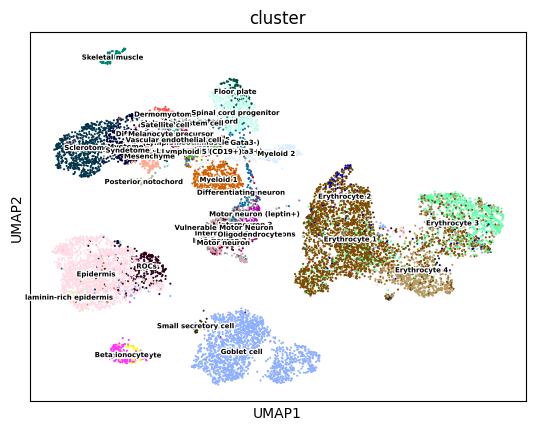

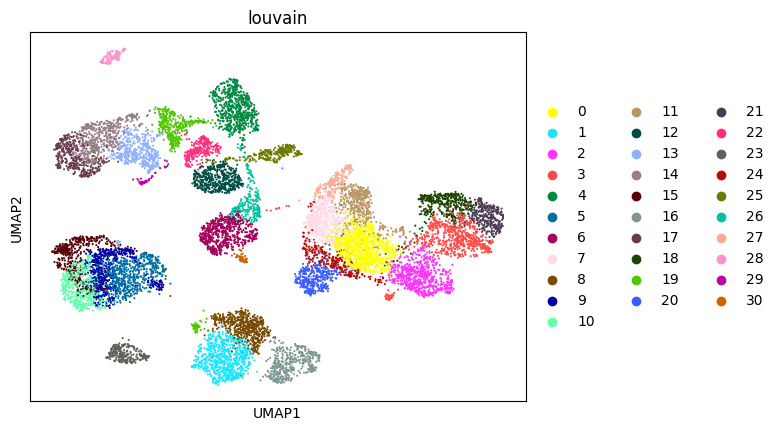

Adjusted Rand Index (ARI): 0.3376
Silhouette Score: 0.1917
Approximate RAND Index: 0.6688


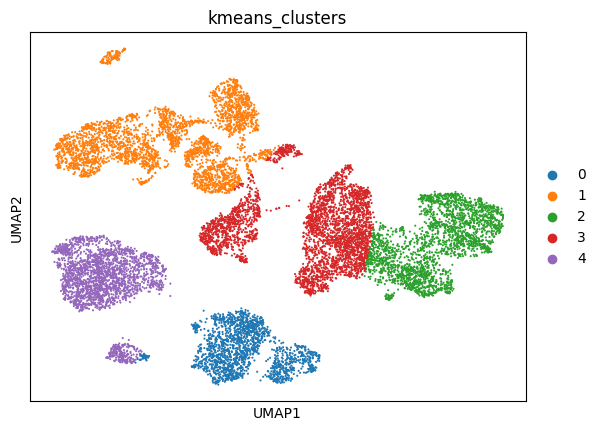

In [ ]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score


sc.pp.pca(adata, n_comps=20)
sc.pp.neighbors(adata, n_neighbors=19, n_pcs=15)
sc.tl.umap(adata)
sc.tl.louvain(adata, resolution=1.0)  
adata.obs['louvain_clusters'] = adata.obs['louvain'].astype(str)
sc.pl.umap(adata, color=['louvain_clusters'])
sc.pp.pca(adata, n_comps=20)
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=19)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['cluster'], legend_loc='on data', legend_fontsize=5, legend_fontoutline=2)
umap_data = adata.obsm['X_umap']
kmeans = KMeans(n_clusters=5, random_state=42)
adata.obs['kmeans_clusters'] = kmeans.fit_predict(umap_data).astype(str)
def find_louvain_resolution(target_clusters=5, start_res=0.1, end_res=2.0, step=0.1):

    for res in np.arange(start_res, end_res, step):
        sc.tl.louvain(adata, resolution=res)
        num_clusters = adata.obs['louvain'].nunique()
        if num_clusters == target_clusters:
            print(f"Optimal Louvain resolution found: {res}")
            return res
    return end_res  

optimal_res = find_louvain_resolution(target_clusters=5, start_res=0.5, end_res=2.0, step=0.1)
sc.tl.louvain(adata, resolution=optimal_res)
sc.pl.umap(adata, color=['louvain'])
real = adata.obs['cluster'].astype('category').cat.codes
numer = adata.obs['louvain'].astype('category').cat.codes
ari = adjusted_rand_score(real, numer)
sil = silhouette_score(adata.obsm["X_pca"], numer)
rand = (ari + 1) / 2  

print("ARI: {}".format(ari))
print("Silhouette Score: {}".format(sil))
print("RAND Index: {}".format(rand))

In [ ]:

import scanpy as sc
import numpy as np
import optuna
from sklearn.metrics import adjusted_rand_score, silhouette_score

true_labels_numeric = adata.obs['cluster'].astype('category').cat.codes

def objective(trial):
  
    n_comps = trial.suggest_int("n_comps", 20, 50, step=5)  
    n_pcs = trial.suggest_int("n_pcs", 10, n_comps, step=5)  
    n_neighbors = trial.suggest_int("n_neighbors", 5, 20, step=2)  
    sc.pp.pca(adata, n_comps=n_comps)
    sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=n_pcs)
    sc.tl.leiden(adata, resolution=1.5)  
    leiden_labels_numeric = adata.obs['louvain_clusters'].astype('category').cat.codes

    ari = adjusted_rand_score(true_labels_numeric, leiden_labels_numeric)
    sil = silhouette_score(adata.obsm["X_pca"], leiden_labels_numeric)

    return ari + sil  

study = optuna.create_study(direction="maximize") 
study.optimize(objective, n_trials=20)  

print("Best hyperparameters found:", study.best_params)



[I 2025-02-20 15:59:10,809] A new study created in memory with name: no-name-87974064-6ed6-4f7d-8ec0-44086f523dfd
d:\anaconda\envs\nlp\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [5, 20] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 19].
  warnings.warn(
Exception ignored in: <function DataIter.__del__ at 0x000001F3D7B06FC0>
Traceback (most recent call last):
  File "d:\anaconda\envs\nlp\Lib\site-packages\xgboost\core.py", line 572, in __del__
    assert self._temporary_data is None
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: 
C:\Users\W\AppData\Local\Temp\ipykernel_19904\2951794160.py:24: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=1.5)
[I 2025-02-20 15:59:33

Best hyperparameters found: {'n_comps': 20, 'n_pcs': 15, 'n_neighbors': 19}


cluster
Epidermis               1800
Goblet cell             1754
ROCs                     254
Beta ionocyte            207
Alpha ionocyte            56
Melanocyte stem cell      37
Small secretory cell      37
Melanocyte                25
Melanocyte precursor      21
Name: count, dtype: int64


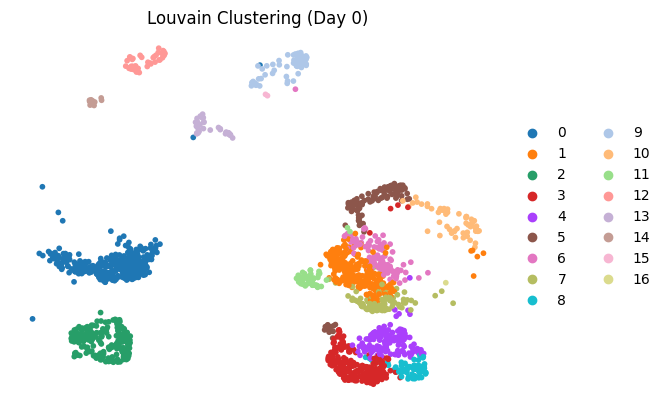

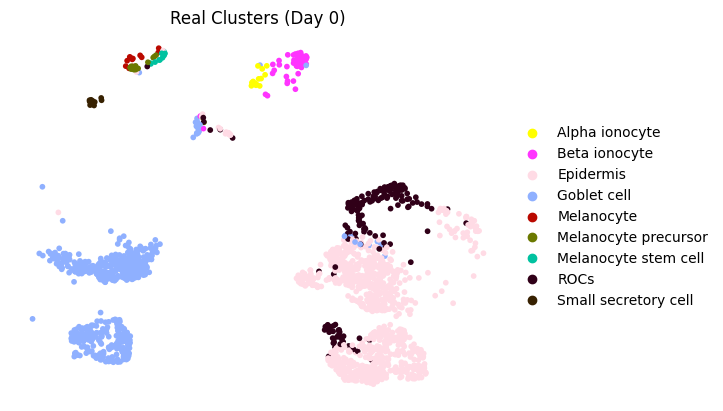

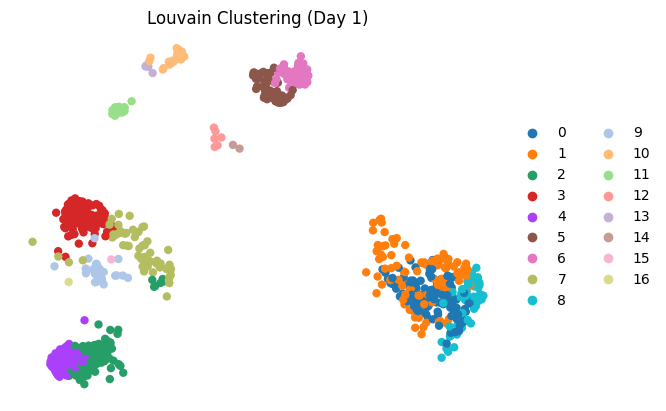

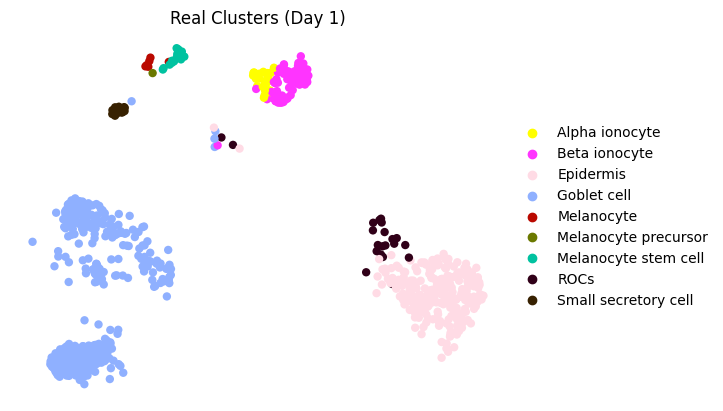

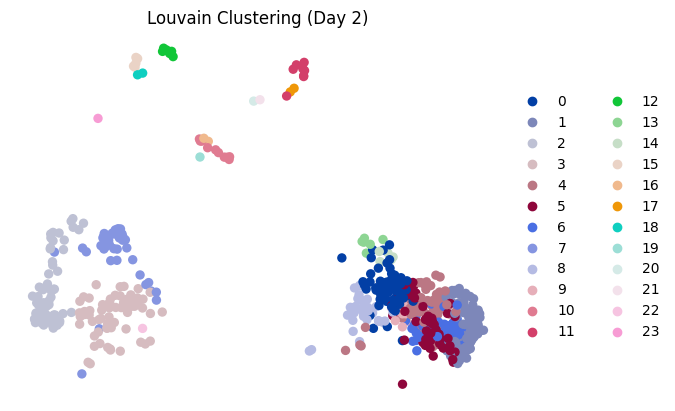

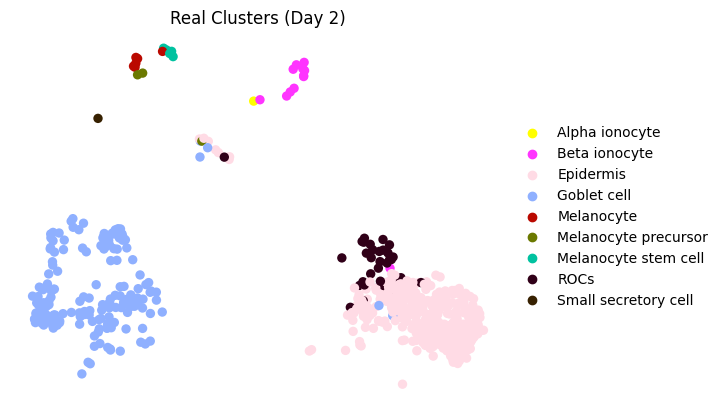

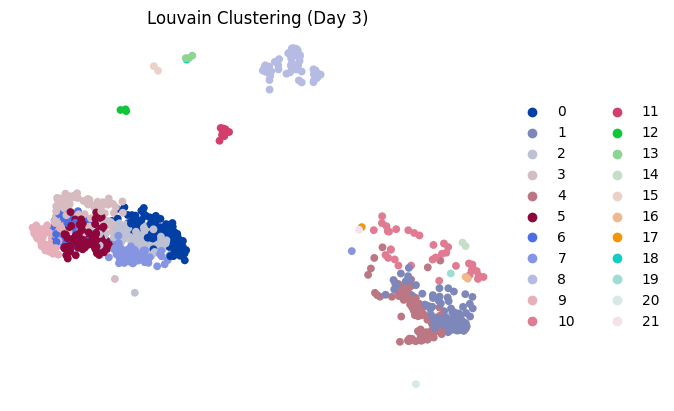

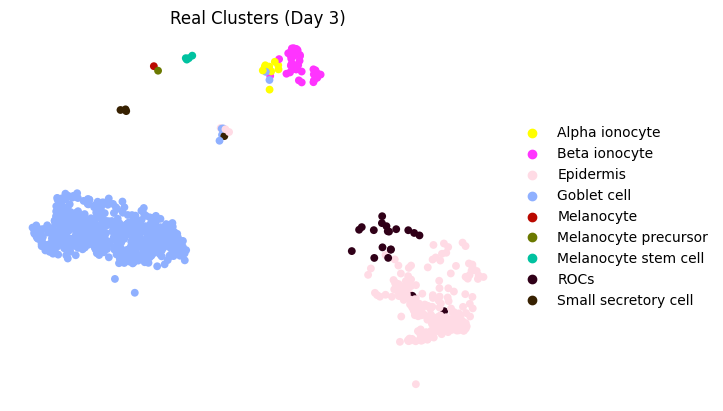

In [ ]:
import scanpy as sc
import matplotlib.pyplot as plt
skin_clusters = [
    "ROCs", "Epidermis", "Laminin-rich epidermis",
    "Melanocyte", "Melanocyte precursor", "Melanocyte stem cell",
    "Goblet cell", "Alpha ionocyte", "Beta ionocyte", "Small secretory cell"
]

adata_skin = adata[adata.obs['cluster'].isin(skin_clusters)].copy()
print(adata_skin.obs['cluster'].value_counts())
sc.pp.pca(adata_skin, n_comps=20)
sc.pp.neighbors(adata_skin, n_neighbors=15, n_pcs=20)
sc.tl.umap(adata_skin)  
umap_coords = adata_skin.obsm["X_umap"].copy()
unique_days = sorted(adata_skin.obs['DaysPostAmputation'].unique())
for day in unique_days:
    adata_day = adata_skin[adata_skin.obs['DaysPostAmputation'] == day].copy()
    sc.tl.louvain(adata_day, resolution=1.0) 
    adata_day.obsm["X_umap"] = umap_coords[adata_skin.obs['DaysPostAmputation'] == day, :]
    adata_day.obs['louvain_clusters'] = adata_day.obs['louvain'].astype(str)
    sc.pl.umap(adata_day, color=['louvain_clusters'], title=f"Louvain Clustering (Day {day})", frameon=False)
    sc.pl.umap(adata_day, color=['cluster'], title=f"Real Clusters (Day {day})", frameon=False)
    plt.show()


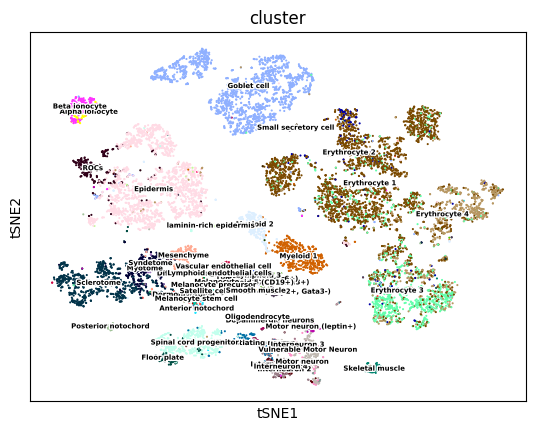

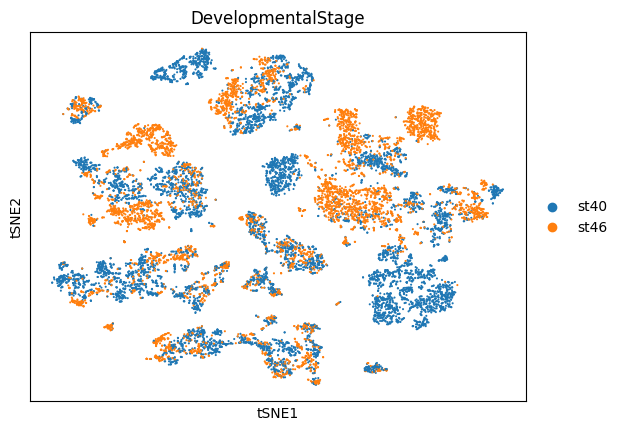

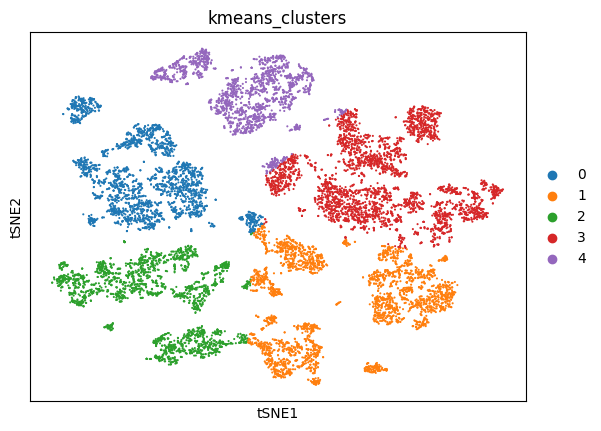

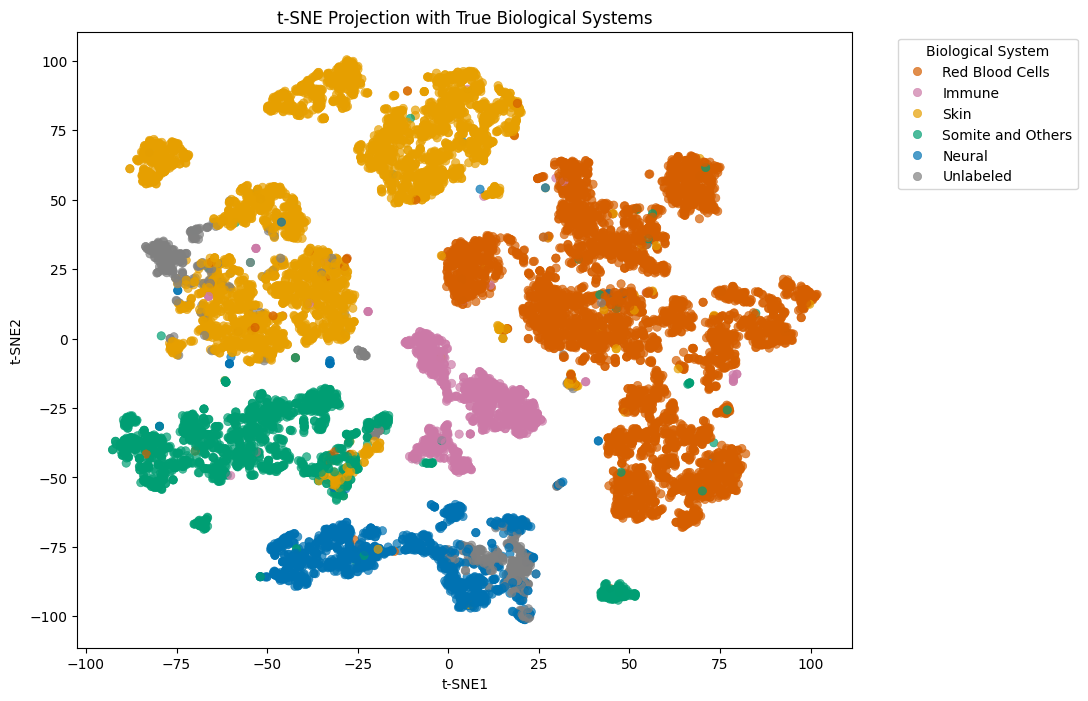

In [ ]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

sc.pp.pca(adata, n_comps=35)  
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
sc.tl.tsne(adata, n_pcs=30, perplexity=30)
sc.pl.tsne(adata, color=['cluster'], legend_loc='on data', legend_fontsize=5, legend_fontoutline=2)  
sc.pl.tsne(adata, color=['DevelopmentalStage'], cmap='viridis')
sc.pl.tsne(adata, color=['cluster'], save="_clusters_tsne.png")
tsne_data = adata.obsm['X_tsne']
kmeans = KMeans(n_clusters=5, random_state=42)
adata.obs['kmeans_clusters'] = kmeans.fit_predict(tsne_data).astype(str) 
def find_leiden_resolution(target_clusters=5, start_res=0.1, end_res=2.0, step=0.1):
    for res in np.arange(start_res, end_res, step):
        sc.tl.leiden(adata, resolution=res)
        num_clusters = adata.obs['leiden'].nunique()
        if num_clusters == target_clusters:
            print(f"Optimal resolution found: {res}")
            return res
    
    return end_res 

optimal_res = find_leiden_resolution(target_clusters=5, start_res=0.5, end_res=2.0, step=0.1)
sc.tl.leiden(adata, resolution=optimal_res)
sc.pl.tsne(adata, color=['kmeans_clusters'])
system_labels = {
    'Skin': ['Goblet cell', 'Regeneration Organizing Cell (ROC)', 'Epidermis', 'Melanocyte', 'Melanocyte precursor', 'Melanocyte stem cell', 'Laminin-rich epidermis', 'Alpha ionocyte', 'Beta ionocyte', 'Small secretory cell'],
    'Neural': ['Differentiating neuron', 'Dopaminergic neurons', 'Spinal cord progenitor', 'Floor plate', 'Oligodendrocyte', 'Vulnerable motor neuron', 'Motor neuron', 'Motor neuron (leptin+)', 'Interneuron 1', 'Interneuron 2', 'Interneuron 3', 'Interneuron 4'],
    'Immune': ['Lymphoid 1 (Gata2-, Gata3+)', 'Lymphoid 2 (Cxcr6+)', 'Lymphoid 3', 'Lymphoid 4 (Gata2+, Gata3-)', 'Lymphoid 5 (CD19+)', 'Lymphoid endothelial cell', 'Myeloid 1', 'Myeloid 2'],
    'Somite and Others': ['Skeletal muscle', 'Smooth muscle', 'Sclerotome', 'Syndetome', 'Myotome', 'Differentiating myocyte', 'Mesenchyme', 'Satellite cell', 'Dermomyotome', 'Posterior notochord', 'Anterior notochord', 'Vascular endothelial cell'],
    'Red Blood Cells': ['Erythrocyte 1', 'Erythrocyte 2', 'Erythrocyte 3', 'Erythrocyte 4']
}
adata.obs['biological_system'] = 'Unlabeled'  
for system, cell_types in system_labels.items():
    adata.obs.loc[adata.obs['cluster'].isin(cell_types), 'biological_system'] = system

system_palette = {
    'Skin': '#E69F00',  
    'Neural': '#0072B2',  
    'Immune': '#CC79A7', 
    'Somite and Others': '#009E73', 
    'Red Blood Cells': '#D55E00',  
    'Unlabeled': 'gray'
}

plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=adata.obs['biological_system'], palette=system_palette, alpha=0.7, edgecolor=None)
plt.title("t-SNE Projection with True Biological Systems")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.legend(title="Biological System", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
import scanpy as sc


sc.tl.rank_genes_groups(adata, groupby='cluster', method='wilcoxon')
roc_de_genes = pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)

print("Top ROC Marker Genes Identified by Differential Expression Analysis:")
print(roc_de_genes)
print(roc_de_genes.columns)

d:\anaconda\envs\nlp\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
d:\anaconda\envs\nlp\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
d:\anaconda\envs\nlp\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:440: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of

{'params': {'groupby': 'cluster', 'reference': 'rest', 'method': 'wilcoxon', 'use_raw': False, 'layer': None, 'corr_method': 'benjamini-hochberg'}, 'names': rec.array([('slc26a2.2.L', 'gpx3.S', 'Xelaev18041411m.g', 'Xelaev18016933m.g', 'rbpms2.L', 'hnrnpa2b1.S', 'scg2.S', 'fgfbp2.L', 'hbd.S', 'rfesd.L', 'Xelaev18047460m.g', 'slc4a1.L', 'col8a1.S', 'loc100494945.S', 'nova1.L', 'sncb.S', 'tlx3.L', 'sncb.L', 'loc100493999.like.S', 'ccl5.S', 'Xelaev18038083m.g', 'gzmh.S', 'loc101734073.L', 'tmem26.L', 'rab38.L', 'Xetrov90015728m.L', 'marcks.S', 'hpd.like.1.L', 'map1b.L', 'gap43.S', 'crp.4.L', 'cyba.L', 'thbs4.S', 'bcas1.L', 'eln2.L', 'col14a1.S', 'rbm6.S', 'col9a1.L', 'myl1.L', 'otog.S', 'ctgfl.L', 'krt8.S', 'angptl1.L', 'ptrf.S', 'pcp4.S', 'mdk.L'),
           ('atp6v1b1.L', 'krt8.L', 'Xelaev18017913m.g', 'ncl.S', 'sept7.L', 'hmgb3.L', 'tal2.L', 'col17a1.L', 'Xelaev18045099m.g', 'lmo2.S', 'Xelaev18045095m.g', 'Xelaev18045083m.g', 'loc100490646.S', 'loc100497729.L', 'gng3.L', 'sncb.L', 'sn

d:\anaconda\envs\nlp\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
d:\anaconda\envs\nlp\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
d:\anaconda\envs\nlp\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:440: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of

In [ ]:

print(roc_de_genes)
print("roc",roc_de_genes['ROCs'])

roc_de_genes.to_csv("cell_type_markers.csv", index=False)

      Alpha ionocyte Anterior notochord      Beta ionocyte       Dermomyotome  \
0        slc26a2.2.L             gpx3.S  Xelaev18041411m.g  Xelaev18016933m.g   
1         atp6v1b1.L             krt8.L  Xelaev18017913m.g              ncl.S   
2        atp6ap1.1.L      rarg.like.1.S          atp6v1d.S               nme2   
3         atp6v0d2.L              tnn.L           cystm1.L           nhp2l1.S   
4         atp6v0a4.L      rarg.like.1.L         atp6v1g3.S           zc3h10.S   
5  Xelaev18040968m.g            krt18.L  Xelaev18020203m.g            snu13.L   
6             msln.L  Xelaev18038969m.g          atp6v0b.S  Xelaev18024282m.g   
7         atp6v1g3.L  Xelaev18020022m.g         atp6v1g3.L  Xelaev18037790m.g   
8          atp6v0c.S  Xelaev18047575m.g  Xelaev18040968m.g            nop56.L   
9          atp6v0b.S             ngfr.S          slc25a3.L  Xelaev18020022m.g   

  Differentiating myocyte Differentiating neuron Dopaminergic neurons  \
0                rbpms2.L          

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

matching_genes = [gene for gene in adata.var_names if 'lef' in gene.lower() or 'tp63' in gene.lower()]
print("Possible alternative ROC marker names:", matching_genes)

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

adata.obs['ROC_binary'] = (adata.obs['cluster'] == 'ROCs').astype(int)

X = adata.X  
y = adata.obs['ROC_binary'].values  

scaler = StandardScaler(with_mean=False)  
X_scaled = scaler.fit_transform(X)

logreg = LogisticRegression(penalty='l1', solver='saga', C=0.1, max_iter=500)
logreg.fit(X_scaled, y)

gene_importance = np.abs(logreg.coef_[0])  
gene_ranking = pd.DataFrame({'Gene': adata.var_names, 'Score': gene_importance})

gene_ranking = gene_ranking.sort_values(by='Score', ascending=False)

print("Top ROC Marker Genes Identified by Logistic Regression:")
print(gene_ranking.head(10))


Possible alternative ROC marker names: ['lef1.L', 'lef1.S', 'lefty.L', 'tp63.L', 'tp63.S']
Top ROC Marker Genes Identified by Logistic Regression:
                    Gene     Score
56             frem2.1.L  0.131557
17241             cpa6.L  0.103751
25368             pltp.S  0.101447
6829              fgf9.L  0.088940
543       loc101732555.L  0.088227
6273             egfl6.L  0.088093
12010            lpar3.L  0.087046
17997     loc100127750.S  0.085754
703    Xetrov90029035m.L  0.085380
14088  Xelaev18026267m.g  0.080701


d:\anaconda\envs\nlp\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [6]:
deter_list = list(gene_ranking['Gene'].head(50))
deter_list = [gene[:-2] for gene in deter_list]
print(deter_list)
list1 = ['wnt5a',
'loc100488523',
'loc100492954',
'egfl6',
'lpar3',
'cpa6',
'sp9',
'fgf9',
'fbn2',
'tinagl1',
'fgf7',
'vwde',
'lef1',
'lamb2',
'fgfr4',
'fgf7',
'rspo2',
'cpa6',
'loc100498358',
'krt',
'loc100486832',
'jag1',
'Xelaev18043128m',
'dlx2',
'tp73',
'gdf6',
'Xelaev18046800m',
'nid2',
'igfbp2',
'ism2',
'dlx2',
'loc100493805',
'frem2',
'Xelaev18044182m',
'bmp5',
'tspear',
'sema3f',
'robo4',
'jchain',
'rspo2',
'adamts18',
'pltp',
'Xelaev18034799m',
'lamb1',
'lamb1',
'unc5b',
'mmp28',
'fgf10',
'pzp',
'galnt15',
]
matches = sum(1 for gene in list1 if gene in deter_list)

# Calculate the match ratio
match_ratio = matches / len(deter_list)
print(match_ratio)

['frem2.1', 'cpa6', 'pltp', 'fgf9', 'loc101732555', 'egfl6', 'lpar3', 'loc100127750', 'Xetrov90029035m', 'Xelaev18026267m', 'Xelaev18044969m', 'Xelaev18002122m', 'optc', 'cyp26c1', 'sp9', 'npff', 'tinagl1', 'lama1', 'kif26a', 'loc100486548', 'Xetrov90028158m', 'jag1', 'fstl1', 'mmp3', 'fgfr4', 'loc4952', 'Xelaev18043128m', 'loc100494738', 'snai2', 'krt', 'Xelaev18005859m', 'Xelaev18027412m', 'nid2', 'krt6', 'fgf7', 'Xelaev18028101m', 'eva1b', 'rps20', 'Xelaev18003966m', 'krt18', 'krt16', 'apoc1.like', 'cldn6.1', 'Xelaev18029042m', 'bmp4', 'emx1', 'fn1', 'ptgs1', 'vwa2', 'arsg']
0.3


In [6]:
from xgboost import XGBClassifier

# Train XGBoost Model
xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_scaled, y)

# Extract feature importance
gene_importance = xgb_model.feature_importances_
gene_ranking = pd.DataFrame({'Gene': adata.var_names, 'Score': gene_importance})

# Sort genes by importance
gene_ranking = gene_ranking.sort_values(by='Score', ascending=False)

print("Top ROC Marker Genes Identified by XGBoost:")
print(gene_ranking.head(10))

d:\anaconda\envs\nlp\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:34:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Top ROC Marker Genes Identified by XGBoost:
                    Gene     Score
703    Xetrov90029035m.L  0.252335
56             frem2.1.L  0.080717
18316          col14a1.S  0.031952
7139             hmgn1.S  0.030458
8206             postn.S  0.019650
6302           c2orf40.L  0.016748
25368             pltp.S  0.015039
5882            nucks1.L  0.014658
18626          col17a1.L  0.013015
365             eif4a1.S  0.011918


In [7]:
deter_list = list(gene_ranking['Gene'].head(50))
deter_list = [gene[:-2] for gene in deter_list]
print(deter_list)
list1 = ['wnt5a',
'loc100488523',
'loc100492954',
'egfl6',
'lpar3',
'cpa6',
'sp9',
'fgf9',
'fbn2',
'tinagl1',
'fgf7',
'vwde',
'lef1',
'lamb2',
'fgfr4',
'fgf7',
'rspo2',
'cpa6',
'loc100498358',
'krt',
'loc100486832',
'jag1',
'Xelaev18043128m',
'dlx2',
'tp73',
'gdf6',
'Xelaev18046800m',
'nid2',
'igfbp2',
'ism2',
'dlx2',
'loc100493805',
'frem2',
'Xelaev18044182m',
'bmp5',
'tspear',
'sema3f',
'robo4',
'jchain',
'rspo2',
'adamts18',
'pltp',
'Xelaev18034799m',
'lamb1',
'lamb1',
'unc5b',
'mmp28',
'fgf10',
'pzp',
'galnt15',
]
matches = sum(1 for gene in list1 if gene in deter_list)

# Calculate the match ratio
match_ratio = matches / len(deter_list)
print(match_ratio)

['Xetrov90029035m', 'frem2.1', 'col14a1', 'hmgn1', 'postn', 'c2orf40', 'pltp', 'nucks1', 'col17a1', 'eif4a1', 'dstn', 'Xelaev18003627m', 'cyp26c1', 'fzd8', 'fn1', 'epyc', 'cpa6', 'loc100490088', 'vwa2', 'cpamd8', 'Xelaev18028634m', 'anxa2', 'loc101735282', 'mdk', 'ifitm1', 'pnhd', 'csk', 'Xelaev18036372m', 'apoc1.like', 'Xelaev18045095m', 'loc100486548', 'brk1', 'pfn1', 'gpr37', 'sp9', 'p4hb', 'lamb2', 'thbs1', 'cldn6.1', 'atg3', 'eif4g3.like', 'col5a3.like', 'optc', 'cox7c', 'mmp3', 'plp2', 'Xelaev18036119m', 'plk2', 'Xelaev18018006m', 'MGC75753']
0.1


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

adata.obs['ROC_binary'] = (adata.obs['cluster'] == 'ROCs').astype(int)
X = adata.X.toarray()  
y = adata.obs['ROC_binary'].values  
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_scaled, y)
gene_importance = rf_model.feature_importances_
gene_ranking = pd.DataFrame({'Gene': adata.var_names, 'Score': gene_importance})
gene_ranking = gene_ranking.sort_values(by='Score', ascending=False)
print("Top ROC Marker Genes Identified by Random Forest:")
print(gene_ranking.head(10))


Top ROC Marker Genes Identified by Random Forest:
                    Gene     Score
18316          col14a1.S  0.017968
7009             mxra5.S  0.014642
6850              mmp3.L  0.013885
703    Xetrov90029035m.L  0.012611
56             frem2.1.L  0.012152
25835              fn1.S  0.009898
16596             vwde.L  0.009722
9242   Xelaev18017960m.g  0.009170
16484            bambi.L  0.008514
24298              sp9.L  0.008246


In [4]:
deter_list = list(gene_ranking['Gene'].head(50))
deter_list = [gene[:-2] for gene in deter_list]
print(deter_list)
list1 = ['wnt5a',
'loc100488523',
'loc100492954',
'egfl6',
'lpar3',
'cpa6',
'sp9',
'fgf9',
'fbn2',
'tinagl1',
'fgf7',
'vwde',
'lef1',
'lamb2',
'fgfr4',
'fgf7',
'rspo2',
'cpa6',
'loc100498358',
'krt',
'loc100486832',
'jag1',
'Xelaev18043128m',
'dlx2',
'tp73',
'gdf6',
'Xelaev18046800m',
'nid2',
'igfbp2',
'ism2',
'dlx2',
'loc100493805',
'frem2',
'Xelaev18044182m',
'bmp5',
'tspear',
'sema3f',
'robo4',
'jchain',
'rspo2',
'adamts18',
'pltp',
'Xelaev18034799m',
'lamb1',
'lamb1',
'unc5b',
'mmp28',
'fgf10',
'pzp',
'galnt15',
]
matches = sum(1 for gene in list1 if gene in deter_list)

# Calculate the match ratio
match_ratio = matches / len(deter_list)
print(match_ratio)

['col14a1', 'mxra5', 'mmp3', 'Xetrov90029035m', 'frem2.1', 'fn1', 'vwde', 'Xelaev18017960m', 'bambi', 'sp9', 'loc100486548', 'Xelaev18026267m', 'krt', 'lama1', 'pltp', 'col27a1', 'cpa6', 'fgf9', 'nid2', 'egfl6', 'loc100490088', 'fgf7', 'rspo2', 'apoc1.like', 'lpar3', 'krt18', 'fgf7', 'loc100486832', 'prdm1', 'mmp19.like.2', 'loc100127750', 'loc100492954', 'efemp2', 'cpa6', 'c3', 'lama5', 'mdk', 'vwa2', 'cpamd8', 'fras1', 'egfl6', 'jchain', 'lamb2', 'hpgd', 'dlx2', 'tinagl1', 'gdf6', 'vcan', 'loc100490088', 'lamc1']
0.44
